# Применение Keras для решения задачи прогнозирования цены на недвижимость

In [136]:
from sklearn.datasets import _california_housing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

## Загрузка данных

In [137]:
data = _california_housing.fetch_california_housing()
X, y = data['data'], data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

## Описание нейронной сети

In [138]:
model = keras.Sequential([
    layers.Dense(X_train.shape[1], activation='relu'), # the number of neurons comprising first layer is equal to the number of features (columns) in your data
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear'), # NN is a regressor
])

## Настройка обучения

In [139]:
model.compile(
    # процедура обучения - алгоритм Adam с темпом обучения 0.000001
    optimizer=keras.optimizers.Adam(learning_rate=0.000001),
    # минимизируемая функция - Среднеквадратичная ошибка
    loss=keras.losses.MeanSquaredError(),
    # при обучении мониторится Среднеквадратичная ошибка
    metrics=[keras.metrics.MSE],
)

## Обучение нейронной сети

In [140]:
batch_size, epochs = 128, 1000
metrics_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/1000
121/121 [==============================] - 1s 789us/step - loss: 14411.6113 - mean_squared_error: 14411.6113
Epoch 2/1000
121/121 [==============================] - 0s 778us/step - loss: 14069.0615 - mean_squared_error: 14069.0615
Epoch 3/1000
121/121 [==============================] - 0s 765us/step - loss: 13731.5303 - mean_squared_error: 13731.5303
Epoch 4/1000
121/121 [==============================] - 0s 773us/step - loss: 13396.3779 - mean_squared_error: 13396.3779
Epoch 5/1000
121/121 [==============================] - 0s 789us/step - loss: 13068.3164 - mean_squared_error: 13068.3164
Epoch 6/1000
121/121 [==============================] - 0s 797us/step - loss: 12747.0781 - mean_squared_error: 12747.0781
Epoch 7/1000
121/121 [==============================] - 0s 765us/step - loss: 12431.6836 - mean_squared_error: 12431.6836
Epoch 8/1000
121/121 [==============================] - 0s 789us/step - loss: 12121.5674 - mean_squared_error: 12121.5674
Epoch 9/1000
121/121 [==

## Визуализация среднеквадратичной ошибки от эпохи

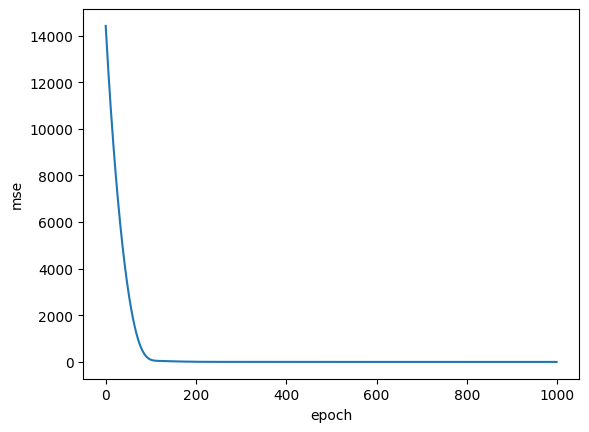

In [141]:
import matplotlib.pyplot as plt

plt.plot(metrics_history.history['mean_squared_error'])
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

## Оценка метрики(mse) нейросети

In [142]:
model.evaluate(X_test, y_test, batch_size=batch_size)

41/41 [==============================] - 0s 903us/step - loss: 1.3543 - mean_squared_error: 1.3543


[1.354312539100647, 1.354312539100647]